In [5]:

from sklearn.datasets import fetch_openml
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

def load_dataset(partition):
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
    y = y.astype(int)[:int(len(X)*partition//1)]
    X = X/255
    X=X[:int(len(X)*partition//1)]
    print(len(X))
    return X,y

In [6]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler

X,y= load_dataset(.33)

23100


784


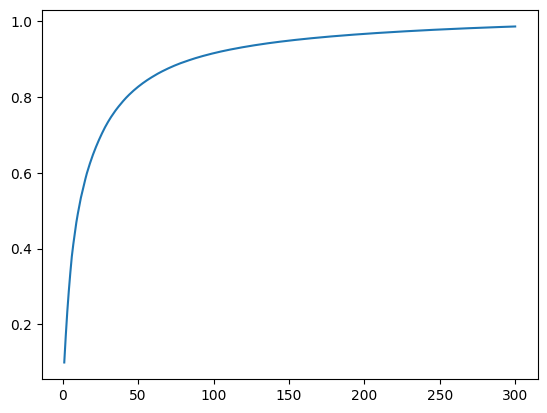

In [7]:
from matplotlib import pyplot as plt
print(len(X.columns))
n_components=300
pca=PCA(n_components=n_components)
pca.fit(X)

ks=np.arange(1,n_components+1)
plt.plot(ks,np.cumsum(pca.explained_variance_ratio_))
Xs=pca.transform(X)

In [8]:
from sklearn.cluster import MeanShift
from sklearn.metrics import rand_score
from tqdm.notebook import tqdm
import csv
import time
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/mean_shift.txt'
data=[]
try:
  with open(path,"r") as f:
      bandwiths=eval(f.readline())
      pca_dimension=eval(f.readline())
      while(True):
        l=f.readline()
        if l=="": break
        if l!="\n":
          data.append(eval("["+l+"]"))
      f.close()

except:
  print("no_cache")
  bandwiths=[.5,1,2,3,4,5]
  pca_dimension=list(range(10,211,20))
  pca_dimension.insert(0,2)
  w=open(path,"w")
  w.writelines(str(bandwiths)+"\n")
  w.writelines(str(pca_dimension)+"\n")
  w.close()

print(data)

for i,pc in enumerate(pca_dimension):
    if (len(data)-1)>i:continue
    pca=PCA(n_components=pc)
    pca.fit(X)
    Xs=pca.transform(X)
    print("PCA: "+str(pc))
    for j,n in tqdm(enumerate(bandwiths)):
        if len(data)-1==i and len(data[i])>j: continue
        sti=time.time()
        sc=MeanShift(bandwidth=n, n_jobs=-1)
        pred=sc.fit_predict(Xs)
        ts=time.time()-sti
        res=[rand_score(y,pred),ts,len(set(pred))]
        w= open(path,'a')
        w.write(str(res)+" , ")
        w.flush()
        w.close()
        print("\t bandwith: "+str(n)+" res: "+str(res))
    w= open(path,'a')
    w.write("\n")
    w.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
no_cache
[]
PCA: 2


0it [00:00, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-3832288866>", line 43, in <cell line: 0>
    pred=sc.fit_predict(Xs)
         ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 719, in fit_predict
    self.fit(X, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_mean_shift.py", line 503, in fit
    all_res = Parallel(n_jobs=self.n_jobs)(
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/parallel.py", line 77, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

TypeError: object of type 'NoneType' has no len()